In [111]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines

In [114]:
vis_df=pd.read_csv("Resources/cleaned_oscar_df3.csv")
vis_df.head()

,Film,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Content Rating,Directors,Actors,Production Company,director_movie_nominated
0,Wings,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",PG-13,William Wellman,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",unknown,2
1,Battleground,Metro-Goldwyn-Mayer,Nominee,1949,118,"Action,Drama,History",7.5,"6,970",NR,William Wellman,"Van Johnson, Ricardo Montalban, John Hodiak, G...",MGM,2
2,7th Heaven,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",unknown,unknown,unknown,unknown,0
3,The Racket,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",unknown,unknown,unknown,unknown,0
4,Alibi,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,unknown,unknown,unknown,unknown,0


In [117]:
# Comparing directors

top_directors = vis_df.groupby('Directors')['IMDB Rating'].mean().reset_index()
top_directors = top_directors.sort_values('IMDB Rating', ascending=False)
top_10_directors=top_directors.head(10)
top_10_directors

,Directors,IMDB Rating
67,Frank Darabont,8.950000
216,Robert Zemeckis,8.800000
193,Peter Jackson,8.800000
127,Jonathan Demme,8.600000
197,Quentin Tarantino,8.533333
173,Milos Forman,8.500000
63,Francis Ford Coppola,8.466667
35,Charles Chaplin,8.400000
244,Todd Phillips,8.400000
222,Sam Mendes,8.300000


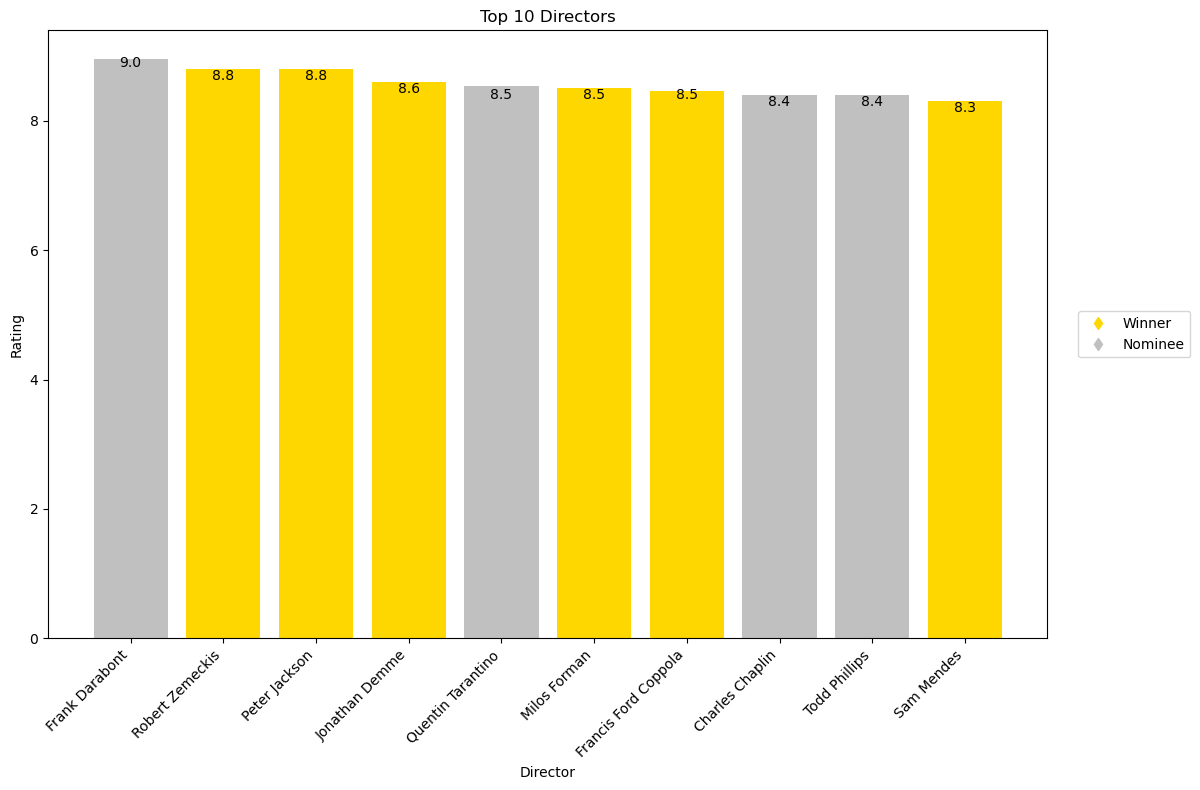

In [122]:
# Creating visual for average rating by Director

directors = top_10_directors['Directors']
rating = top_10_directors['IMDB Rating']
winners = vis_df[vis_df['Award'] == 'Winner']['Directors']


plt.figure(figsize=(12, 8))
colors = ['gold' if director_name in winners.values else 'silver' for director_name in directors]
bars = plt.bar(directors, rating, color=colors)

for bar in bars:
    height = round(bar.get_height(), 1)
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='top')

plt.title("Top 10 Directors")
plt.xlabel("Director")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha='right')


gold = mlines.Line2D([], [], color='gold', marker='d', linestyle='None',label='Winner')
silver = mlines.Line2D([], [], color='silver', marker='d', linestyle='None',label='Nominee')

plt.legend(loc='center right',bbox_to_anchor=(1.15, .5),handles=[gold, silver])
plt.tight_layout()

plt.savefig("Images/director_avg_rating.jpeg")

plt.show()

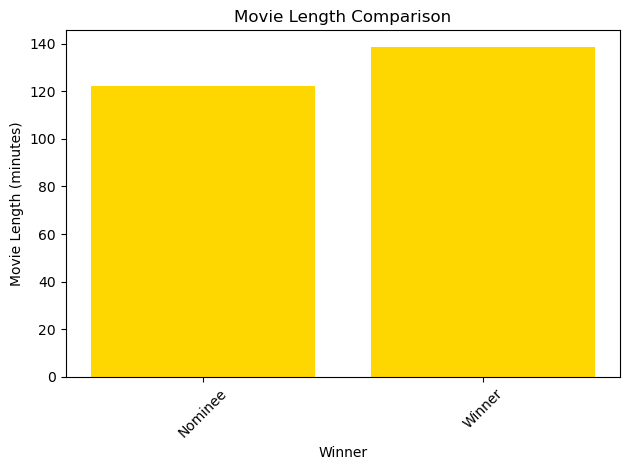

In [54]:
# Comparing average movie length for winners and nominees

movie_length = vis_df.groupby('Award')['Movie Time'].mean().reset_index()
award = movie_length['Award'][:10]
time = movie_length['Movie Time'][:10]
plt.bar(award, time,color="gold")
plt.title("Movie Length Comparison")
plt.xlabel("Winner")
plt.ylabel("Movie Length (minutes)")
plt.xticks(rotation=45)
plt.tight_layout() 
plt.savefig("Images/movie_length.jpeg")
plt.show()

In [21]:
# Comparing top movies 

top_movies = vis_df.groupby(['Film', 'Award'])['IMDB Rating'].first().reset_index()
top_movies = top_movies.sort_values('IMDB Rating', ascending=False)
top_10_movies=top_movies.head(10)
top_10_movies

,Film,Award,IMDB Rating
501,The Shawshank Redemption,Nominee,9.3
427,The Godfather,Winner,9.2
428,The Godfather Part II,Winner,9.0
0,12 Angry Men,Nominee,9.0
465,The Lord of the Rings: The Return of the King,Winner,8.9
323,Pulp Fiction,Nominee,8.9
346,Schindler's List,Winner,8.9
213,Inception,Nominee,8.8
157,Forrest Gump,Winner,8.8
464,The Lord of the Rings: The Fellowship of the Ring,Nominee,8.8


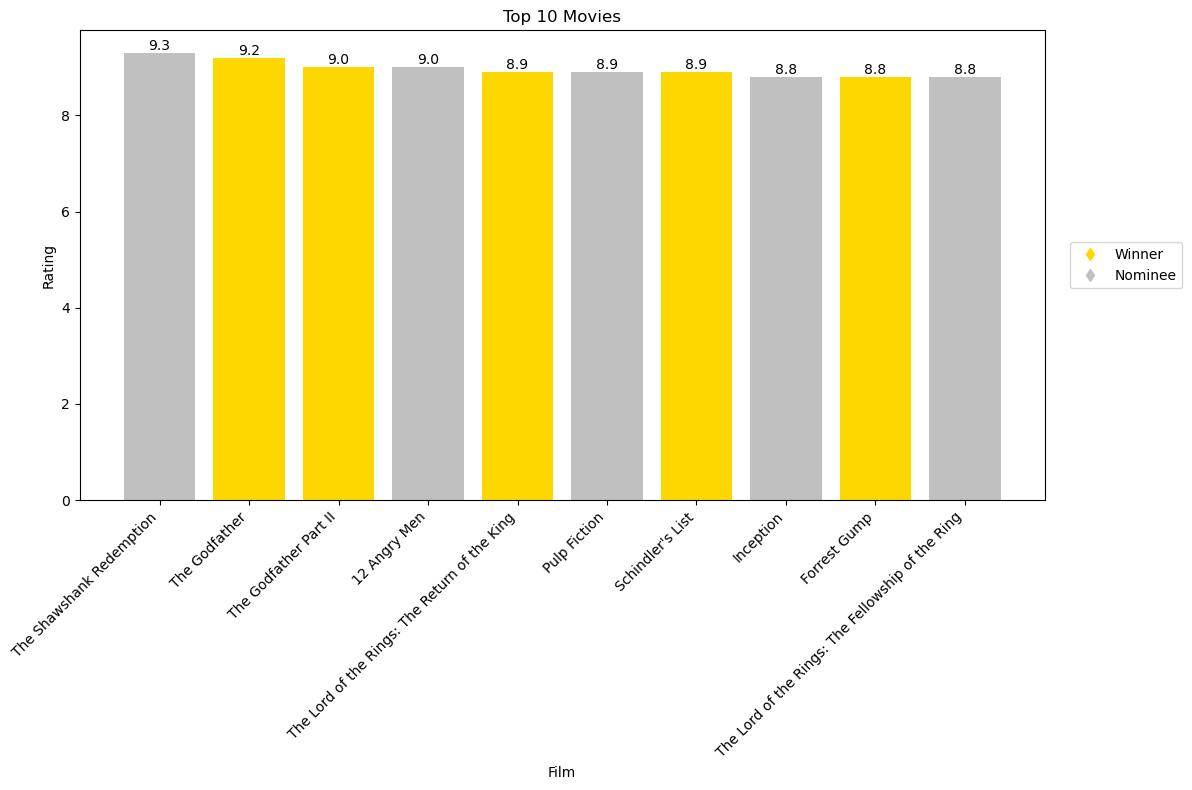

In [64]:
# Creating plot for top movies

film = top_10_movies['Film']
rating = top_10_movies['IMDB Rating']
winners = top_movies[top_movies['Award'] == 'Winner']['Film']

plt.figure(figsize=(12, 8))
colors = ['gold' if film_name in winners.values else 'silver' for film_name in film]
bars = plt.bar(film, rating, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.title("Top 10 Movies")
plt.xlabel("Film")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha='right')
legend_handles = [plt.Rectangle((0, 0), 1, 1, color='gold'), plt.Rectangle((0, 0), 1, 1, color='silver')]
legend_labels = ['Winner = Gold', 'Nominee = Silver']

gold = mlines.Line2D([], [], color='gold', marker='d', linestyle='None',label='Winner')
silver = mlines.Line2D([], [], color='silver', marker='d', linestyle='None',label='Nominee')

plt.legend(loc='center right',bbox_to_anchor=(1.15, .5),handles=[gold, silver])
plt.tight_layout()

plt.savefig("Images/top_movies.jpeg")

plt.show()

In [56]:
# Comparing winning production companies
prod_co = vis_df.loc[vis_df['Award'] == 'Winner', 'Production Company'].value_counts()
prod_co

MGM                          13
unknown                      12
Paramount Pictures            9
20th Century Fox              8
Warner Brothers Pictures      7
United Artists                7
Universal Pictures            7
Sony Pictures                 6
Columbia Pictures             4
Miramax Films                 4
Fox Searchlight               3
The Weinstein Company         2
Orion Pictures                2
Dreamworks                    2
New Line Cinema               1
Lionsgate Films               1
NCM Fathom                    1
Woodfall Film Productions     1
Open Road Films               1
RKO Radio Pictures            1
A24 Films                     1
Name: Production Company, dtype: int64

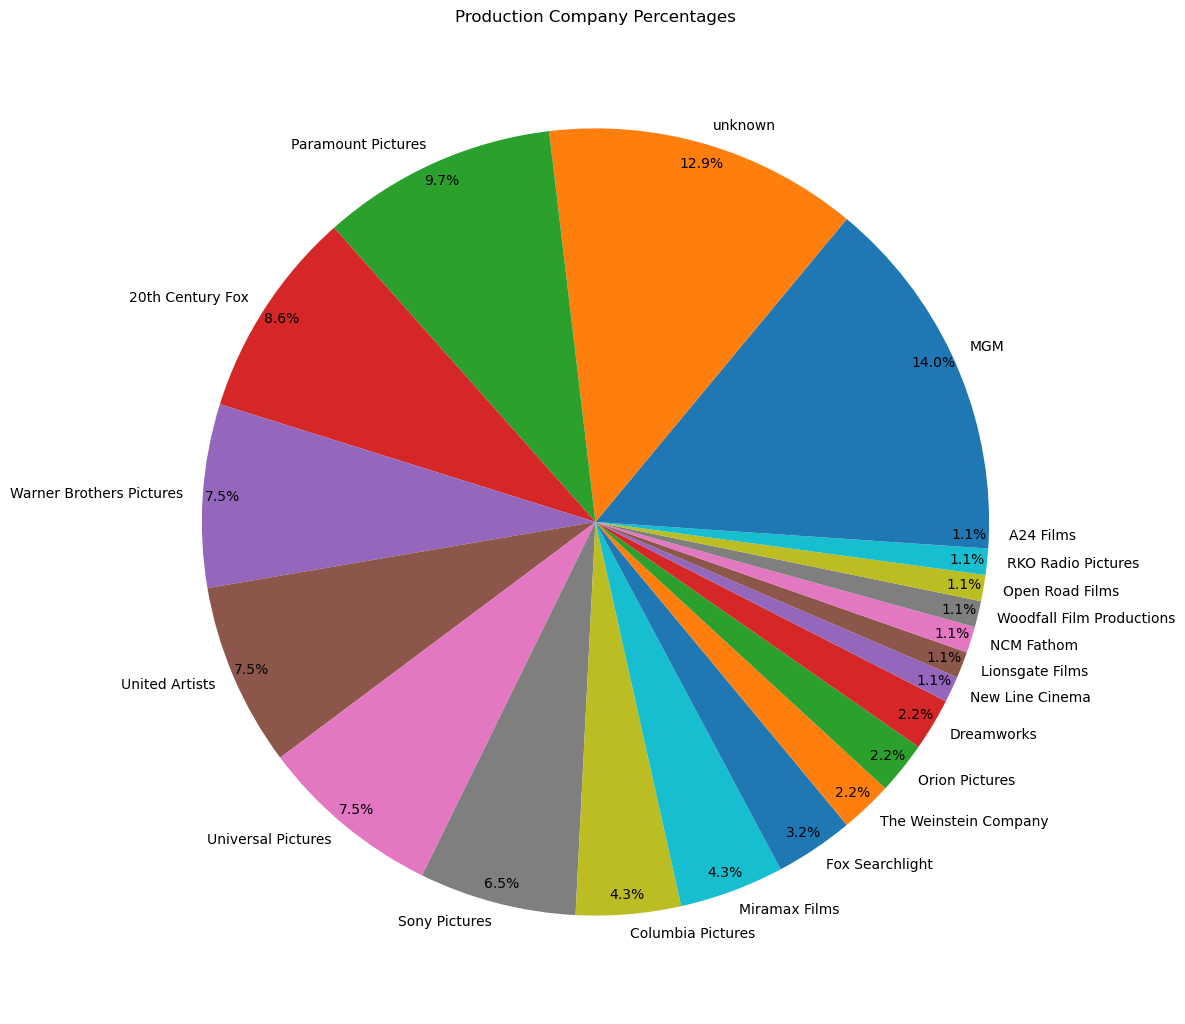

In [88]:
# creating pie chart for production company comparison
plt.figure(figsize=(12, 12)) 
plt.pie(prod_co, labels=prod_co.index, autopct='%1.1f%%',pctdistance=.95, labeldistance=1.05)
plt.title('Production Company Percentages')
plt.tight_layout()

plt.savefig("Images/production_co.jpeg")
# Display the chart
plt.show()

In [58]:
# Import csv for genres
genre_df=pd.read_csv("Resources/vis.csv")
genre_df

,Film,Film Studio/Producer(s),Year of Release,Movie Time,IMDB Rating,IMDB Votes,Actors,director_movie_nominated,Winner,Animation,...,The Weinstein Company,TriStar Pictures,Turner Home Entertainment,USA Films,United Artists,Universal Pictures,Walt Disney Pictures,Warner Brothers Pictures,Woodfall Film Productions,unknown_production_company
0,Wings,Famous Players-Lasky,1927,144,7.5,"12,221","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",2,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Battleground,Metro-Goldwyn-Mayer,1949,118,7.5,"6,970","Van Johnson, Ricardo Montalban, John Hodiak, G...",2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7th Heaven,Fox,1927,110,7.7,"3,439",unknown,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,The Racket,The Caddo Company,1928,84,6.7,"1,257",unknown,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Alibi,Feature Productions,1929,91,5.8,765,unknown,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Bohemian Rhapsody,Graham King,2018,134,7.9,"482,597","Rami Malek, Lucy Boynton, Gwilym Lee, Ben Hard...",1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,The Favourite,"Ceci Dempsey, Ed Guiney, Lee Magiday, and Yorg...",2018,119,7.5,"183,744","Olivia Colman, Emma Stone, Rachel Weisz, Nicho...",1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,A Star Is Born,"Bill Gerber, Bradley Cooper, and Lynette Howel...",2018,136,7.6,"354,157","Lady Gaga, Bradley Cooper, Sam Elliott, Andrew...",1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
569,Joker,"Todd Phillips, Bradley Cooper, and Emma Tillin...",2019,122,8.4,"1,056,051","Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
start_index = 9
end_index = 31
genre_totals = genre_df.iloc[:, start_index:end_index].sum()
print(genre_totals)

Animation      3.0
Western       15.0
Thriller      40.0
Drama        502.0
Comedy       126.0
Adventure     67.0
Action        39.0
Biography    109.0
Crime         72.0
War           42.0
Family        27.0
Mystery       28.0
Horror         3.0
Music         53.0
Romance      174.0
Sport         10.0
Musical       30.0
History       67.0
Fantasy       24.0
Sci-Fi        10.0
Film-Noir     13.0
G             48.0
dtype: float64


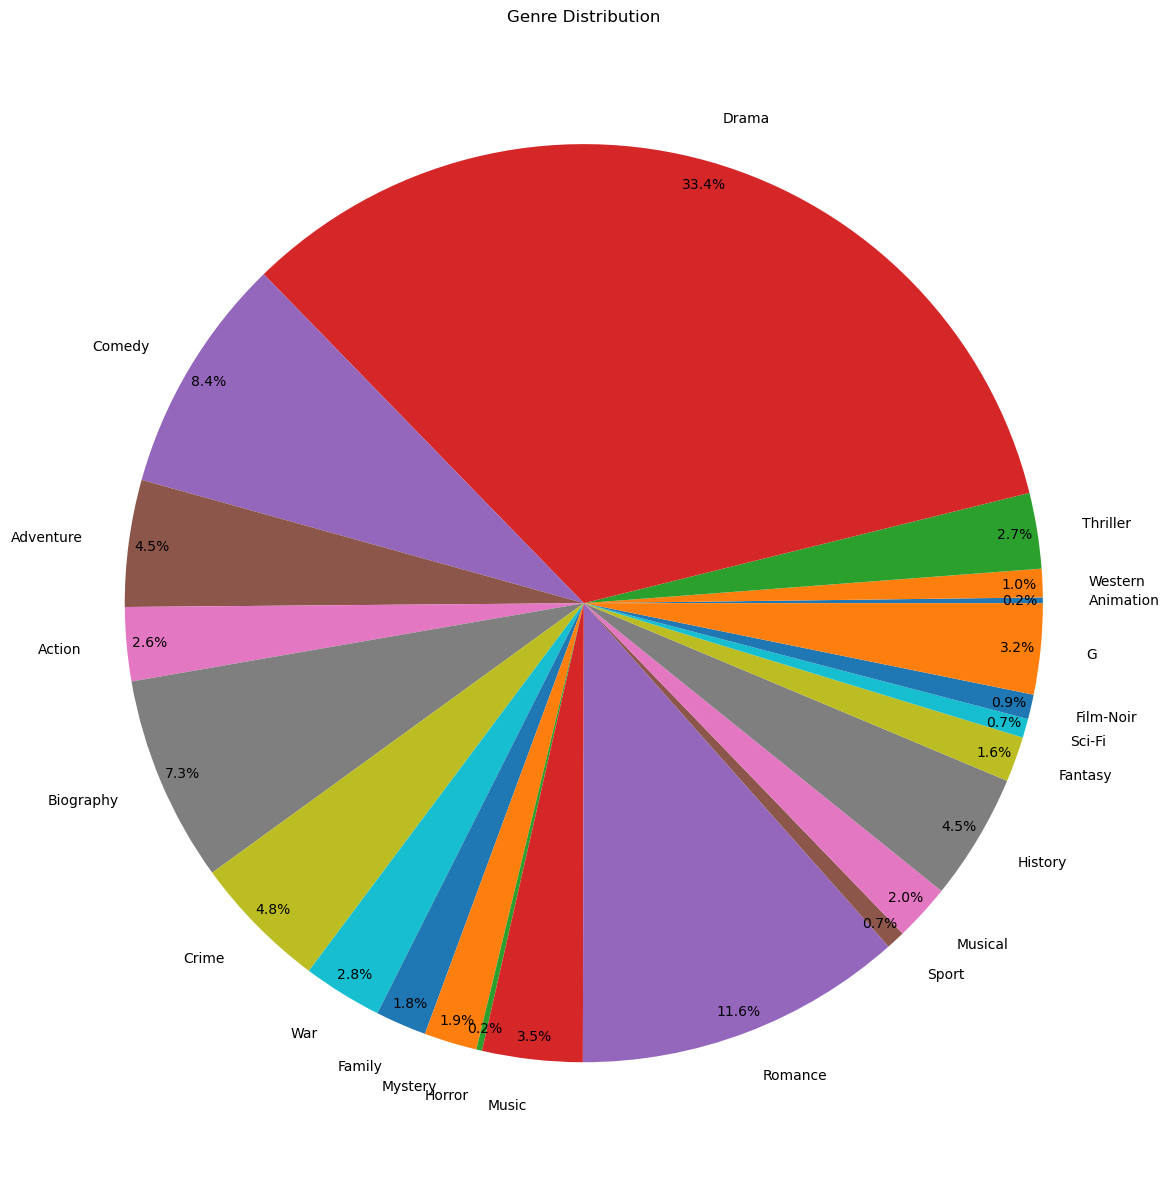

In [84]:
# creating pie chart for genre comparison
plt.figure(figsize=(12, 12)) 
plt.pie(genre_totals, labels=genre_totals.index, autopct='%1.1f%%',pctdistance=.95, labeldistance=1.1)
plt.title('Genre Distribution')
plt.tight_layout()

plt.savefig("Images/top_genres.jpeg")
# Display the chart
plt.show()